# Spam detection Model

Spam detection is one of the major applications of Machine Learning in the interwebs today. Pretty much all of the major email service providers have spam detection systems built in and automatically classify such mail as 'Junk Mail'.

In this project we will be using the Naive Bayes algorithm to create a model that can classify dataset SMS messages as spam or not spam, based on the training we give to the model. 

It is important to have some level of monitoring as to what a spammy text message might look like. 

Usually they have words like 'free', 'win', 'winner', 'cash', 'prize' and the like in them as these texts are designed to catch your eye and in some sense tempt you to open them. 

Also, spam messages tend to have words written in all capitals and also tend to use a lot of exclamation marks. 

To the recipient, it is usually pretty straightforward to identify a spam text and our objective here is to train a model to do that for us!

Being able to identify spam messages is a binary classification problem as messages are classified as either 'Spam' or 'Not Spam' and nothing else.

In [40]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [41]:
df = pd.read_table('data', names = ['label', 'sms_message'])

# Output printing out first 5 columns
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Here ham = Not Spam & Spam = Is Spam messages

In [42]:
df.groupby('label').describe()

sms_message                                                            \
            count unique                                                top   
label                                                                         
ham          4825   4516                             Sorry, I'll call later   
spam          747    653  Please call our customer service representativ...   

            
      freq  
label       
ham     30  
spam     4

<AxesSubplot:xlabel='label', ylabel='count'>

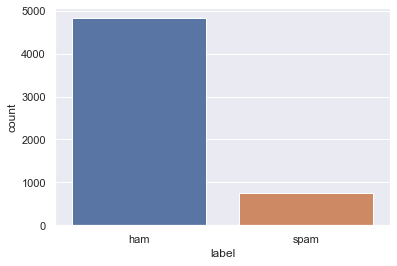

In [43]:
sns.countplot(data=df, x='label')

Distribution plot for "ham" & "spam"

### Our approach:

1. Clean and Normalize text
2. Convert text into vectors (using bag of words model) that machine learning models can understand
3. Train and test Classifier

### Data Preprocessing

Now that we have a basic understanding of what our dataset looks like, lets convert our labels to binary variables, 0 to represent 'ham'(i.e. not spam) and 1 to represent 'spam' for ease of computation.

Why we need to do this because, Scikit-learn only deals with numerical values and hence if we were to leave our label values as strings, scikit-learn would do the conversion internally.

In [44]:
lb = {'ham':0, 'spam':1}

In [45]:
df['label'] = df['label'].replace(lb)

In [46]:
df.shape

(5572, 2)

## Bag of words
What we have here in our data set is a large collection of text data (5,572 rows of data). 

Most ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy.

Here we'd like to introduce the Bag of Words(BoW) concept which is a term used to specify the problems that have a 'bag of words' or a collection of text data that needs to be worked with. 

The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. 

It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter.

Using a process which we will go through now, we can covert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

### Text Pre-processing

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. One method is the the bag-of-words approach, where each unique word in a text will be represented by one number.

In this section we'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

### Tokenization
Tokenization converts continuous stream of words into seprate token for each word.

### To handle this, we will be using "sklearns count vectorizer" method which does the following:

* It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.


* It counts the occurrence of each of those tokens.


* The CountVectorizer method automatically converts all tokenized words to their lower case form so that it does not treat words like 'He' and 'he' differently. It does this using the lowercase parameter which is by default set to True.

## Let's Take an Example

In [47]:
'''
Here we will look to create a frequency matrix on a smaller document set to make sure we understand how the 
document-term matrix generation happens. We have created a sample document set 'documents'.
'''
documents = ['Hello, how are you!',
                'Win money, win from home.',
                'Call me now.',
                'Hello, Call hello you tomorrow?']

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

Fit your document dataset to the CountVectorizer object you have created using fit(), and get the list of words which have been categorized as features using the get_feature_names() method.

In [49]:
count_vector.fit(documents)
count_vector.get_feature_names()

C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

Now we will Create a matrix with the rows being each of the 4 documents, and the columns being each word. The corresponding (row, column) value is the frequency of occurrence of that word(in the column) in a particular document(in the row). 

In [50]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

Now we have a clean representation of the documents in terms of the frequency distribution of the words in them. To make it easier to understand our next step is to convert this array into a dataframe and name the columns appropriately.

In [51]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


# Model Training

In [52]:
# split into training and testing sets
# USE from sklearn.model_selection import train_test_split to avoid seeing deprecation warning.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

### Applying Bag of Words processing to our dataset.

Now that we have split the data, our next objective is to apply Bag of words and convert our data into the desired matrix format. To do this we will be using CountVectorizer(). 

There are two steps to consider here:

* Firstly, we have to fit our training data (X_train) into CountVectorizer() and return the matrix.

* Secondly, we have to transform our testing data (X_test) to return the matrix.

Note that X_train is our training data for the 'sms_message' column in our dataset and we will be using this to train our model.

X_test is our testing data for the 'sms_message' column and this is the data we will be using(after transformation to a matrix) to make predictions on.

In [53]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [54]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [55]:
predictions = naive_bayes.predict(testing_data)

In [63]:
predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy score: ', format(accuracy_score(predictions, y_test)))
print('Precision score: ', format(precision_score(predictions, y_test)))
print('Recall score: ', format(recall_score(predictions, y_test)))
print('F1 score: ', format(f1_score(predictions, y_test)))

Accuracy score:  0.9885139985642498
Precision score:  0.9405405405405406
Recall score:  0.9720670391061452
F1 score:  0.9560439560439562


## Conclusion

One of the major advantages that Naive Bayes has over other classification algorithms is its ability to handle an extremely large number of features. 

In our case, each word is treated as a feature and there are thousands of different words. Also, it performs well even with the presence of irrelevant features and is relatively unaffected by them. 

Another important advantage is that its model training and prediction times are very fast for the amount of data it can handle.